# Combine 3 Separate Clean Data Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
!pip install missingno
import missingno as msno
import warnings

%matplotlib inline

color = sb.color_palette("Set2")[0]
palette = sb.color_palette("Set2")

In [2]:
# Data batch 1
file_path = '../data/cleaned_data_v1-1.csv'
df1 = pd.read_csv(file_path, index_col=0)
df1

,EDAD,IDINGRESO,TA_MAX_PRIMERA_URG,TA_MIN_PRIMERA_URG,TEMP_PRIMERA_URG,FC_PRIMERA_URG,SAT_02_PRIMERA_URG,GLU_PRIMERA_URG,IDCDSL,UCI_DAYS,CREA--CREATININA,DD--DIMEROD,LIN--SISTEMATICODESANGRE,PCR--PROTEINACREACTIVA,PLAQ--SISTEMATICODESANGRE,FEMALE,MALE,DEATH,RECOVERED,RECOVERY_IN_PROGRESS
0,55,508,0,0,0.0,0,0,0,508,NaN,0.705000,399.000000,2.290000,6.080000,472.000000,0,1,0,1,0
1,54,509,0,0,0.0,0,0,0,509,NaN,0.800000,398.000000,2.355000,13.310000,657.000000,0,1,0,1,0
2,73,510,0,0,0.0,0,0,0,510,NaN,1.056000,4396.750000,1.482000,3.760000,306.000000,0,1,0,1,0
3,70,512,0,0,0.0,0,0,0,512,NaN,0.670000,497.333333,1.395000,21.986667,278.166667,1,0,0,0,1
4,61,513,0,0,0.0,0,0,0,513,NaN,0.670000,470.000000,1.010000,7.370000,318.000000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,80,2651,0,0,36.6,111,81,0,2651,NaN,1.490000,4569.000000,0.210000,3.440000,179.000000,0,1,1,0,0
930,91,2672,136,74,36.5,76,0,0,2672,NaN,0.600000,759.500000,0.250000,115.590000,209.000000,0,1,1,0,0
931,64,2712,145,80,36.8,94,84,0,2712,NaN,0.798571,1374.500000,1.755714,7.964286,211.142857,0,1,0,1,0
932,80,2734,0,0,0.0,0,0,0,2734,NaN,0.680000,1213.500000,1.165000,13.285000,299.000000,1,0,0,1,0


In [3]:
# Data batch 2
file_path = '../data/cleaned_data_b1-2_v1.csv'
df2 = pd.read_csv(file_path, index_col=0)
df2

,EDAD,IDINGRESO,TA_MAX_PRIMERA_URG,TA_MIN_PRIMERA_URG,TEMP_PRIMERA_URG,FC_PRIMERA_URG,SAT_02_PRIMERA_URG,GLU_PRIMERA_URG,UCI_DAYS,CREA--CREATININA,DD--DIMEROD,LIN--SISTEMATICODESANGRE,PCR--PROTEINACREACTIVA,PLAQ--SISTEMATICODESANGRE,FEMALE,MALE,DEATH,RECOVERED,RECOVERY_IN_PROGRESS
0,85,1,147,68,36.1,67,95,0,NaN,1.460000,25131.000000,0.435000,359.405000,274.500000,0,1,1,0,0
1,68,8,0,0,0.0,0,0,0,0.0,0.605000,37232.500000,0.815000,98.445000,264.000000,1,0,0,0,1
2,68,9,0,0,0.0,0,0,0,42.0,0.340323,4094.210526,1.394167,112.249412,426.638889,1,0,1,0,0
3,63,10,0,0,0.0,0,0,0,20.0,0.772222,5360.666667,1.555000,31.501765,353.833333,0,1,0,1,0
4,59,11,0,0,0.0,0,0,0,6.0,0.517692,2722.666667,1.072143,15.789286,187.428571,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,47,2566,152,96,37.3,95,96,0,NaN,0.770000,285.000000,3.710000,0.430000,218.000000,1,0,0,1,0
2394,53,2567,0,0,0.0,0,0,0,NaN,1.060000,389.000000,1.600000,15.010000,336.000000,0,1,0,1,0
2395,81,2569,159,70,36.4,59,96,0,NaN,0.800000,654.500000,1.830000,7.025000,333.000000,1,0,0,1,0
2396,31,2570,110,90,37.0,108,98,0,NaN,0.820000,NaN,3.180000,23.940000,198.000000,1,0,0,1,0


In [4]:
# Data batch 3
file_path = '../data/cleaned_data_b1-3_v1.csv'
df3 = pd.read_csv(file_path, index_col=0)
df3

,EDAD,IDINGRESO,TA_MAX_PRIMERA_URG,TA_MIN_PRIMERA_URG,TEMP_PRIMERA_URG,FC_PRIMERA_URG,SAT_02_PRIMERA_URG,GLU_PRIMERA_URG,UCI_DAYS,CREA--CREATININA,DD--DIMEROD,LIN--SISTEMATICODESANGRE,PCR--PROTEINACREACTIVA,PLAQ--SISTEMATICODESANGRE,FEMALE,MALE,DEATH,RECOVERED,RECOVERY_IN_PROGRESS
0,78,577,0,0,0,0,0,0,1.0,0.773544,2009.000000,0.899063,122.891268,217.635417,0,1,0,1,0
1,75,44,0,0,0,0,0,0,1.0,1.001282,810.166667,0.552157,54.410800,227.156863,1,0,0,1,0
2,62,585,160,101,0,105,97,0,10.0,0.434615,1346.000000,1.632174,76.676316,227.695652,1,0,0,1,0
3,69,587,141,83,"37,09999847",92,95,0,NaN,0.567333,1309.000000,0.439444,38.168571,182.888889,0,1,0,1,0
4,67,586,151,82,36,84,93,0,NaN,0.370000,3097.666667,1.728182,53.270000,60.500000,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,63,1786,153,86,"36,8",95,0,0,NaN,0.980000,501.000000,1.870000,2.770000,215.000000,1,0,0,1,0
2064,76,1805,142,93,"35,5",67,93,0,NaN,1.630000,2600.000000,1.020000,81.710000,277.000000,1,0,1,0,0
2065,41,1801,118,80,"38,3",104,98,0,NaN,NaN,667.000000,0.900000,65.330000,129.000000,0,1,0,0,1
2066,45,1803,0,0,0,0,0,0,NaN,0.650000,622.000000,0.980000,67.550000,266.000000,1,0,0,0,1


## Combine the Tables

In [5]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=0)
data = df.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 0 to 2067
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EDAD                       5400 non-null   int64  
 1   IDINGRESO                  5400 non-null   int64  
 2   TA_MAX_PRIMERA_URG         5400 non-null   int64  
 3   TA_MIN_PRIMERA_URG         5400 non-null   int64  
 4   TEMP_PRIMERA_URG           5400 non-null   object 
 5   FC_PRIMERA_URG             5400 non-null   int64  
 6   SAT_02_PRIMERA_URG         5400 non-null   int64  
 7   GLU_PRIMERA_URG            5400 non-null   int64  
 8   IDCDSL                     934 non-null    float64
 9   UCI_DAYS                   506 non-null    float64
 10  CREA--CREATININA           5318 non-null   float64
 11  DD--DIMEROD                4925 non-null   float64
 12  LIN--SISTEMATICODESANGRE   5391 non-null   float64
 13  PCR--PROTEINACREACTIVA     5273 non-null   float

In [7]:
data.drop(columns='IDCDSL', inplace=True)

In [8]:
data.drop(columns='UCI_DAYS', inplace=True)

## Further Cleaning

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 0 to 2067
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EDAD                       5400 non-null   int64  
 1   IDINGRESO                  5400 non-null   int64  
 2   TA_MAX_PRIMERA_URG         5400 non-null   int64  
 3   TA_MIN_PRIMERA_URG         5400 non-null   int64  
 4   TEMP_PRIMERA_URG           5400 non-null   object 
 5   FC_PRIMERA_URG             5400 non-null   int64  
 6   SAT_02_PRIMERA_URG         5400 non-null   int64  
 7   GLU_PRIMERA_URG            5400 non-null   int64  
 8   CREA--CREATININA           5318 non-null   float64
 9   DD--DIMEROD                4925 non-null   float64
 10  LIN--SISTEMATICODESANGRE   5391 non-null   float64
 11  PCR--PROTEINACREACTIVA     5273 non-null   float64
 12  PLAQ--SISTEMATICODESANGRE  5391 non-null   float64
 13  FEMALE                     5400 non-null   int64

In [10]:
data.TEMP_PRIMERA_URG.astype(str).replace(',', '.', inplace=True)

In [11]:
# Replace commas with dots
for idx, val in enumerate(data.TEMP_PRIMERA_URG):
    #print(idx, val)
    #print(labworks_ed.ITEM_LAB.iloc[idx])
    value = str(data.TEMP_PRIMERA_URG.iloc[idx])
    data.TEMP_PRIMERA_URG.iloc[idx] = value.replace(',', '.')
    #print(labworks_ed.ITEM_LAB.iloc[idx])
    
data.TEMP_PRIMERA_URG

# Change dtype from object to float
data.TEMP_PRIMERA_URG = data.TEMP_PRIMERA_URG.astype(float)

/Users/karinwiberg/opt/anaconda3/envs/ucml/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


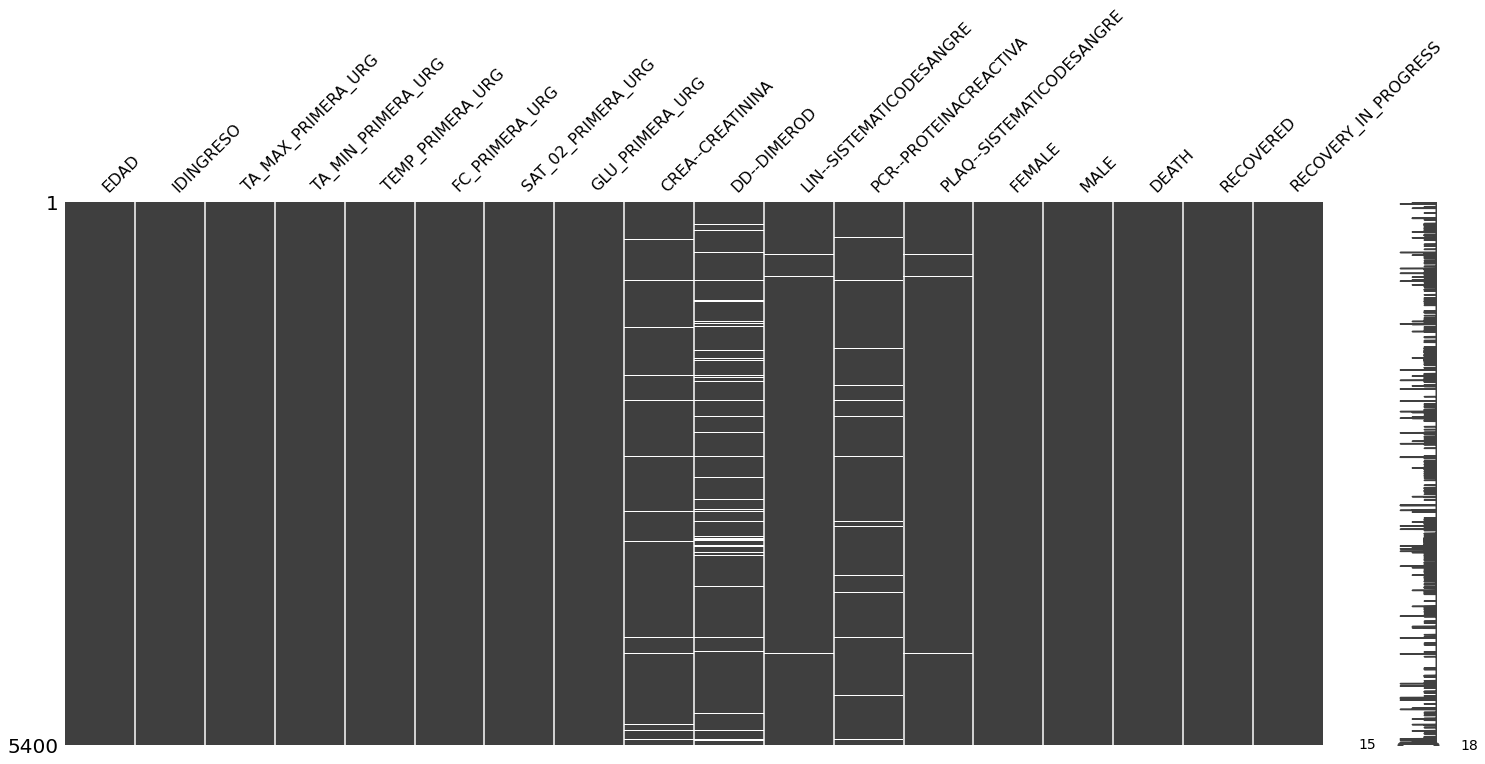

In [17]:
# Display null values
msno.matrix(data);

In [18]:
# Fill na with mean
data['CREA--CREATININA'].fillna(data['CREA--CREATININA'].mean(), inplace=True)
data['DD--DIMEROD'].fillna(data['DD--DIMEROD'].mean(), inplace=True)
data['LIN--SISTEMATICODESANGRE'].fillna(data['LIN--SISTEMATICODESANGRE'].mean(), inplace=True)
data['PCR--PROTEINACREACTIVA'].fillna(data['PCR--PROTEINACREACTIVA'].mean(), inplace=True)
data['PLAQ--SISTEMATICODESANGRE'].fillna(data['PLAQ--SISTEMATICODESANGRE'].mean(), inplace=True)


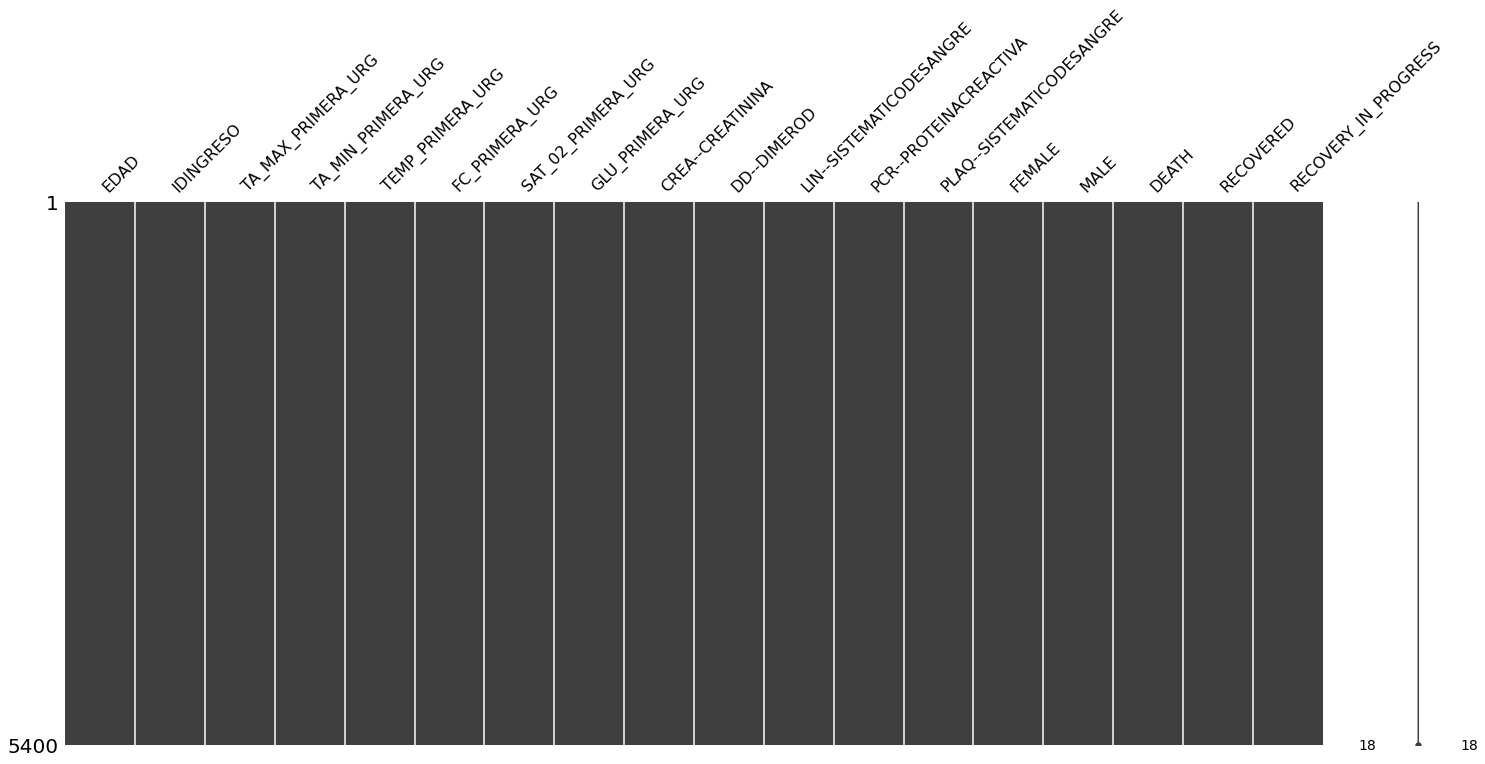

In [19]:
# Check removal of null values
msno.matrix(data);

# Save

In [20]:
# Saving data
path = '../data/'
file_name = 'cleaned_data_v2-combined_v1.csv'
file_path = path + file_name
data.to_csv(file_path)